In [168]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean


In [4]:
ls

 Volume in drive D is DATA
 Volume Serial Number is CCA4-E7FC

 Directory of D:\3-2\AI

04/24/2023  10:39 PM    <DIR>          .
04/24/2023  10:39 PM    <DIR>          ..
04/24/2023  10:39 PM           722,592 AAPL.csv
04/24/2023  04:38 PM            78,876 Genetic Algorithm.ipynb
               2 File(s)        801,468 bytes
               2 Dir(s)  884,262,268,928 bytes free


In [124]:
data = pd.read_csv('AAPL.csv')
data = data.drop(['Date','Adj Close','Volume'],axis=1)
data = data.dropna()

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [184]:
class GeneticAlgorithm:
    def __init__(self, n_population, n_iterations, mutation_rate):
        self.n_population = n_population
        self.n_iterations = n_iterations
        self.mutation_rate = mutation_rate
        
    def fit(self, X, y):
        # Initialize the population
        n_features = X.shape[1]
#         population = np.zeros((self.n_population, n_features))
#         for i in range(self.n_population):
#             population[i, :] = np.random.rand(range(n_features))
#             print(population)
        population = np.random.rand(self.n_population, n_features)
        fitness_return = []
        y_pred_return = []

#         print(population)
        
        
        for i in range(self.n_iterations):
            # Evaluate the fitness of each individual
            
            fitness, y_pred = self._calculate_fitness(X, y, population)
            fitness_return.append(fitness)
            y_pred_return.append(y_pred)

            # Select the parents for the next generation
            parents = self._select_parents(population, fitness)

            # Create the offspring for the next generation
            offspring = self._crossover(parents)

            # Mutate the offspring
            offspring = self._mutate(offspring)

            # Replace the worst individuals in the population with the offspring
            population = self._replace(population, fitness, offspring)

        # Select the best feature subset based on the fitness
        best_features = population[np.argmax(fitness)]
        return best_features,fitness_return, y_pred_return
    def _calculate_fitness(self, X, y, population):
        fitness = np.zeros(self.n_population)
        for i in range(self.n_population):
            features = population[i, :]
            X_subset = X[:, :]
            weights = np.random.uniform(size=X_subset.shape[1])
            y_pred = np.dot(X_subset, weights)
            fitness[i] = np.corrcoef(y_pred, y)[0, 1]
        return fitness, y_pred

    def _select_parents(self, population, fitness):
        fitness_norm = fitness / np.sum(fitness)
        parents = np.zeros((self.n_population // 2, population.shape[1]))
        for i in range(self.n_population // 2):
            indices = np.random.choice(range(self.n_population), size=2, replace=False, p=fitness_norm)
            parents[i, :] = population[indices[0], :]
#             print(parents.shape)
        return parents
    
    def _crossover(self, parents):
        offspring = np.zeros(parents.shape)
        for i in range(parents.shape[0]):
            for j in range(parents.shape[1]):
                if random.uniform(0, 1) < 0.5:
                    offspring[i, j] = parents[i, j]
                else:
                    if i==9:
                        offspring[i,j] = parents[i,j]
                    else:
                        offspring[i, j] = parents[i+1, j]
        return offspring

    def _mutate(self, offspring):
        for i in range(offspring.shape[0]):
            for j in range(offspring.shape[1]):
                if random.uniform(0, 1) < self.mutation_rate:
                    offspring[i, j] = random.random()
        return offspring

    def _replace(self, population, fitness, offspring):
        indices = np.argsort(fitness)[:offspring.shape[0]]
        population[indices, :] = offspring
        return population

In [202]:
n_population = 20
n_iterations=100
mutation_rate=0.05

ga = GeneticAlgorithm(n_population,n_iterations,mutation_rate)
best_features, fitness, y_pred = ga.fit(X, y)


In [204]:
y_pred_1 = np.zeros(n_iterations)
for i in range(n_iterations):
    y_pred_1[i] = mean(abs(y_pred[i] - y))

In [205]:
fitness1 = np.zeros(n_iterations)
for i in range(n_iterations):
    fitness1[i] = mean(fitness[i])

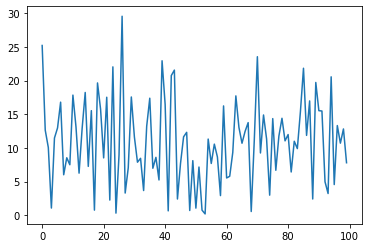

In [206]:
i =range(n_iterations)
plt.plot(i, y_pred_1)
plt.show()

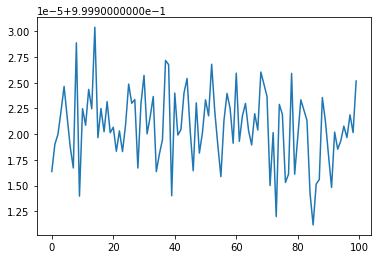

In [207]:
i =range(n_iterations)
plt.plot(i, fitness1)
plt.show()

In [208]:
input = [14.055000,14.830357,14.017857]
pred = np.dot(best_features,np.transpose(input) )

In [209]:
pred

21.924190780919574